<a href="https://colab.research.google.com/github/arazom/KDC-4007-Dataset/blob/master/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     |████████████████████████████████| 25.9 MB 119 kB/s 
     |████████████████████████████████| 10.1 MB 14 kB/s 
     |████████████████████████████████| 596 kB 47.9 MB/s 
     |████████████████████████████████| 102 kB 12.5 MB/s 
     |████████████████████████████████| 675 kB 44.7 MB/s 
     |████████████████████████████████| 4.7 MB 35.4 MB/s 
     |████████████████████████████████| 62 kB 951 kB/s 
     |████████████████████████████████| 812 kB 35.5 MB/s 
     |████████████████████████████████| 38.2 MB 24 kB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=468676ce3e242294e7276cbac4e85425ea71252c81679671c988175fa49584f5
  Stored in directory: /tmp/pip-ephem-wheel-cache-ujojjs6h/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=6b19f29ea4c19fa8987f3b6c7123f117477b6f09517d38e85dddcc80c4803f33
  Stored in directory: /root

In [ ]:
import pandas as pd
pd.__version__

'1.1.5'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import plotly.express as px
import plotly.offline as py
from sklearn.metrics import accuracy_score, classification_report, plot_roc_curve, plot_confusion_matrix, f1_score, ConfusionMatrixDisplay

In [3]:
heart = pd.read_csv("heart.csv")

In [5]:
heart.head()

Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
0   40   M           ATA  ...      0.0        Up             0
1   49   F           NAP  ...      1.0      Flat             1
2   37   M           ATA  ...      0.0        Up             0
3   48   F           ASY  ...      1.5      Flat             1
4   54   M           NAP  ...      0.0        Up             0

[5 rows x 12 columns]

In [54]:
heart.shape

(918, 12)

##DataSet INFO

1. Age : displays the age of the individual.
2. Sex : displays the gender of the individual using the following format :  

*   1 = male
*   0 = female.

 3.(ChestPainType) Chest-pain type : displays the type of chest-pain experienced by the individual using the following format:

  * 1 = typical angina

  * 2 = atypical angina

  * 3 = non - anginal pain

  * 4 = asymptotic

4. (RestingBP)Resting Blood Pressure : displays the resting blood pressure value of an individual in mmHg (unit)

5. (Cholesterol)Serum Cholestrol : displays the serum cholestrol in mg/dl (unit)

6. (FastingBS)Fasting Blood Sugar : compares the fasting blood sugar value of an individual with 120mg/dl.
 If fasting blood sugar > 120mg/dl then :
* 1 (true) else

* 0 (false)

7. (RestingECG)Resting ECG :

* 0 = normal
* 1 = having ST-T wave abnormality
* 2 = left ventricular hyperthrophy

 The resting electrocardiogram is a test that measures the electrical activity of the heart

8. (MaxHR)Max heart rate achieved : displays the max heart rate achieved by an individual.

9. (ExerciseAngina)Exercise induced angina :

1 = yes

0 = no

10.(Oldpeak) ST depression induced by exercise relative to rest : displays the value which is integer or float.

11. (ST_Slope)Peak exercise ST segment :

 1 = upsloping

 2 = flat

 3 = downsloping

12 . (HeartDisease)Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not :
 0 = absence
1 = present.

### Fast Report

In [ ]:
profile=ProfileReport(heart, title=" Heart Disease ", html={'style': {'full_width': True}})

In [ ]:
profile.to_notebook_iframe()
profile.to_file(output_file='Heart_Disease.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Discover and visualize the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83183be550>,
      dtype=object)

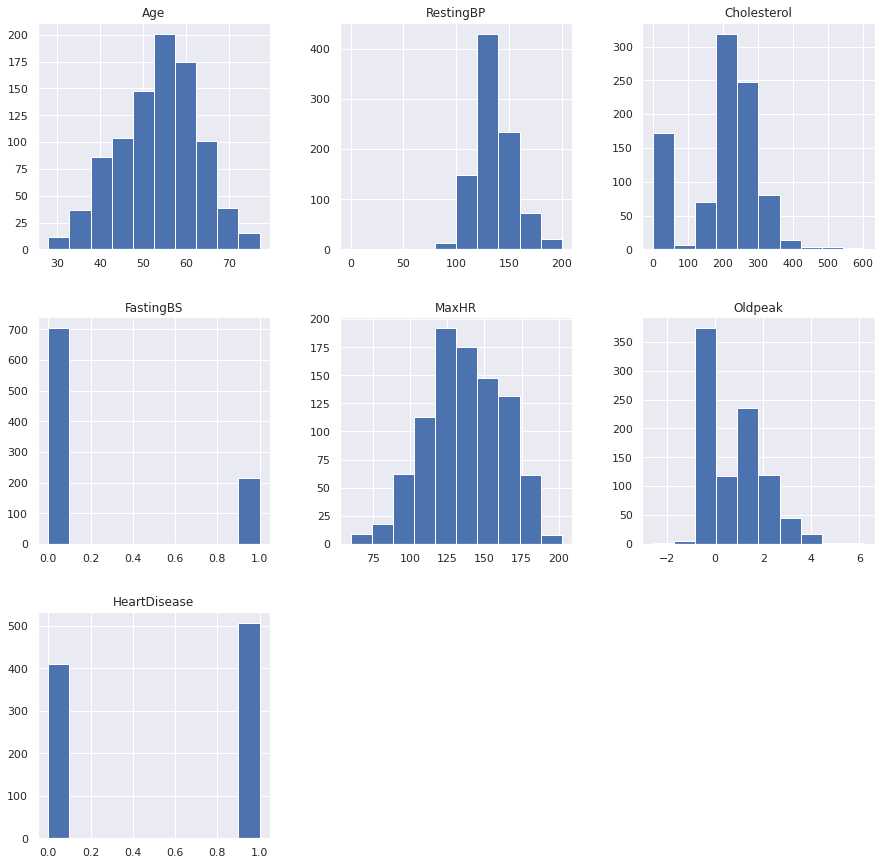

In [ ]:
heart.hist(figsize=(15,15))

In [ ]:
corr_matrix=heart.corr()
corr_matrix['HeartDisease'].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

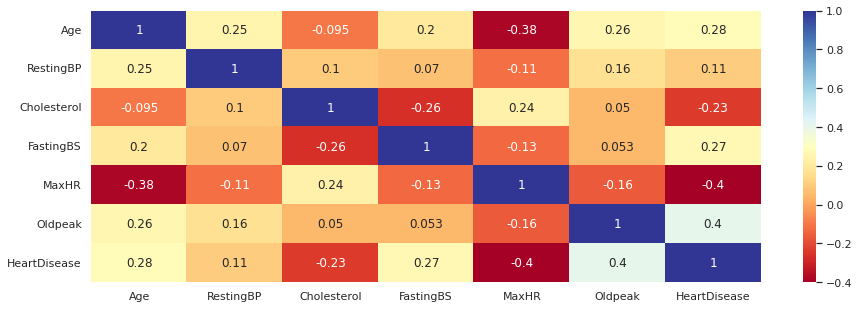

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(heart.corr(),cmap='RdYlBu',annot=True)
plt.show()

# Target Distribution

In [ ]:
px.pie(heart, names='HeartDisease', color_discrete_sequence=px.colors.sequential.Aggrnyl)


we have imbalance Data
more than half of samples are fine (1=m , 0= f

# Age Distribution

In [ ]:

px.histogram(heart,
             x='Age',
             color_discrete_sequence=px.colors.sequential.Aggrnyl,
             hover_data=heart.columns, 
             marginal="box",
             color='HeartDisease')

The above Distribution figure depicts the distribution of Age across all of the heart patient entries in the dataset. According to the graph, the age group 54-55 years has the largest number of patients suffering from heart disease. Patients between the ages of 29 and 31 are far less likely to develop heart disease.

# Gender Distribution

In [ ]:
df=heart.copy()
df['Sex']=df['Sex'].map({
    1:'M',
    0:'F'
})

In [ ]:
px.pie(df, names='Sex',
       color_discrete_sequence=px.colors.sequential.Aggrnyl,
       hole=.6,
       
       )

The above Pie chart depicts the gender distribution of heart disease patients. Looking at the graph, we may deduce that males are two times more likely than females to suffer from heart disease.

# Relation of ECG measurement with Target

In [55]:
px.histogram(heart, x="HeartDisease", color="RestingECG",barmode="group",color_discrete_sequence=px.colors.sequential.Aggrnyl) 

The above graph demonstrates that  restscg value 0 , 1,2 are not so afect to develop heart disease.

agreater number of patients with restscg value 0 are less likely to get heart disease, but a greater number of persons with restscg value 1 are more likely to develop heart disease.

# Relation of Cholestrol with Target

In [18]:
 px.violin(heart, y="Cholesterol",
           color="HeartDisease",
           color_discrete_sequence=px.colors.sequential.Aggrnyl,
           hover_data=heart.columns, 
           points="all",
           box=True ,
           )

The above  plot of cholestrol levels vs. target reveals that people who are more likely to develop heart disease have greater cholestrol levels than those who have goal 0 (not likely to develop heart disease).

## **Cleaning** the Data

# Text and Categorical Attributes

In [4]:
heart.head()

Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
0   40   M           ATA  ...      0.0        Up             0
1   49   F           NAP  ...      1.0      Flat             1
2   37   M           ATA  ...      0.0        Up             0
3   48   F           ASY  ...      1.5      Flat             1
4   54   M           NAP  ...      0.0        Up             0

[5 rows x 12 columns]

In [5]:
print(heart["Sex"].unique())
print(heart["ChestPainType"].unique())
print(heart["RestingECG"].unique())
print(heart["ExerciseAngina"].unique())
print(heart["ST_Slope"].unique())


['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']


In [6]:
heart['HeartDisease'].unique()

array([0, 1])

In [7]:
# using replace function
heart.replace({"M": 1, "F": 0}, inplace=True)
heart.replace({'ATA': 1, 'NAP': 2, 'ASY': 3, 'TA': 4}, inplace=True)
heart.replace({'Normal': 0, 'ST': 1, 'LVH': 2}, inplace=True)
heart.replace({'N': 0, 'Y': 2}, inplace=True)
heart.replace({'Up': 1, 'Flat': 2, 'Down': 3}, inplace=True)


## Feature Extraction

In [8]:
heart.head()

Age  Sex  ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
0   40    1              1  ...      0.0         1             0
1   49    0              2  ...      1.0         2             1
2   37    1              1  ...      0.0         1             0
3   48    0              3  ...      1.5         2             1
4   54    1              2  ...      0.0         1             0

[5 rows x 12 columns]

# Splitting the data

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

Y = heart['HeartDisease']
X = heart.drop('HeartDisease',axis=1)
# x, x_test, y, y_test = train_test_split(X,Y,test_size=0.2,train_size=0.8)
x_train, x_validation, y_train, y_validation = train_test_split(X,Y,test_size=0.1,train_size=0.9)

# **Evalution Fuction**

In [14]:
# Evaluation
from sklearn.metrics import confusion_matrix, f1_score
def evaluation(model):
  y_pred_model = model.predict(x_validation)
  print(f"Accuracy : {model.score(x_validation,y_validation)}")
  print(f"CM : \n {confusion_matrix(y_validation,y_pred_model)}")
  print(f"F1 Score  : {f1_score(y_validation,y_pred_model)}")


# Models

# Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
forest_reg = RandomForestClassifier(max_depth=20)
forest_reg.fit(x_train, y_train)

RandomForestClassifier(max_depth=20)

In [49]:
evaluation(forest_reg)

Accuracy : 0.8152173913043478
CM : 
 [[31  8]
 [ 9 44]]
F1 Score  : 0.8380952380952382


In [50]:
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, x_train, y_train,
scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("Mean (with Cross_val)", rmse_scores.mean())

Mean (with Cross_val) 0.3422079788523037


# accurcy on Train set

In [51]:
# since the most promising algorithm is Random forest 
# we will find the accurecy on the test set
import numpy as np
from sklearn.metrics import mean_squared_error
predictCLF = forest_reg.predict(x_validation)
forest_mse = mean_squared_error(y_validation, predictCLF)
forest_rmse = np.sqrt(forest_mse)
print("RMSE",forest_rmse)
test_accuracy = forest_reg.score(x_validation, y_validation)*100
print("Accuracy:", test_accuracy)

RMSE 0.42986347681054754
Accuracy: 81.52173913043478


In [52]:
print(classification_report(predictCLF,y_validation))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        40
           1       0.83      0.85      0.84        52

    accuracy                           0.82        92
   macro avg       0.81      0.81      0.81        92
weighted avg       0.81      0.82      0.81        92



# Vector machine

In [21]:
from sklearn.svm import SVC
vector_machine = SVC()
vector_machine.fit(x_train,y_train)


SVC()

In [22]:
evaluation(vector_machine)

Accuracy : 0.6413043478260869
CM : 
 [[23 16]
 [17 36]]
F1 Score  : 0.6857142857142857


In [43]:
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(vector_machine, x_train, y_train,
scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("Mean (with Cross_val)", rmse_scores.mean())

Mean (with Cross_val) 0.5222413364061855


# Let's Try tuning it

In [39]:
# Tuning
from sklearn.model_selection import GridSearchCV
gs_svc = GridSearchCV(vector_machine,param_grid={"C":[0.001,0.01,0.1,1.0,10.0,100.0,1000.0]},cv=10)
gs_svc.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]})

In [40]:
gs_svc.best_params_

{'C': 1000.0}

In [41]:
best_svc = gs_svc.best_estimator_
best_svc.fit(x_train,y_train)
evaluation(best_svc)


Accuracy : 0.7282608695652174
CM : 
 [[27 12]
 [13 40]]
F1 Score  : 0.7619047619047619


In [46]:
predictCLF1 = vector_machine.predict(x_validation)

In [47]:
print(classification_report(predictCLF1,y_validation))

              precision    recall  f1-score   support

           0       0.59      0.57      0.58        40
           1       0.68      0.69      0.69        52

    accuracy                           0.64        92
   macro avg       0.63      0.63      0.63        92
weighted avg       0.64      0.64      0.64        92



In [44]:
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_svc, x_train, y_train,
scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("Mean (with Cross_val)", rmse_scores.mean())

Mean (with Cross_val) 0.3772393563267233


In [42]:
# since the most promising algorithm is Random forest 
# we will find the accurecy on the test set
import numpy as np
from sklearn.metrics import mean_squared_error

predictCLF = vector_machine.predict(x_validation)
forest_mse = mean_squared_error(y_validation, predictCLF)
forest_rmse = np.sqrt(forest_mse)
print("RMSE",forest_rmse)
test_accuracy = vector_machine.score(x_validation, y_validation)*100
print("Accuracy:", test_accuracy)

RMSE 0.5989120571285178
Accuracy: 64.13043478260869


# KNeighbors classification

In [24]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)
clff = KNeighborsClassifier()
clff.fit(x_train, y_train);


In [26]:
evaluation(clff)

Accuracy : 0.6304347826086957
CM : 
 [[20 19]
 [15 38]]
F1 Score  : 0.6909090909090909


In [25]:
# since the most promising algorithm is Random forest 
# we will find the accurecy on the test set
import numpy as np
from sklearn.metrics import mean_squared_error

predictCLF = clff.predict(x_validation)
f_mse = mean_squared_error(y_validation, predictCLF)
f_rmse = np.sqrt(f_mse)
print("RMSE",f_rmse)
test_accuracy = clff.score(x_validation, y_validation)*100
print("Accuracy:", test_accuracy)

RMSE 0.6079187588743288
Accuracy: 63.04347826086957


In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def getScore(model, x_validation, y_validation):
    y_pred = model.predict(x_validation)
    print('f1_score')
    print(f1_score(y_validation,y_pred,average='binary'))
    print('accuracy')
    acc = accuracy_score(y_validation,y_pred, normalize=True)
    print(acc)
    print('Confusion Matrix :')
    
    confusion_matrix(y_validation, y_pred, labels=model.classes_)
    ConfusionMatrixDisplay(confusion_matrix, display_labels=model.classes_)
    plt.show()
    return acc

In [79]:
clf_accuracy = getScore(vector_machine, x_validation, y_validation)

f1_score
0.7647058823529411
accuracy
0.7391304347826086
Confusion Matrix :


In [51]:
evaluation(forest_reg)

Accuracy : 0.8695652173913043


ValueError: ignored

In [52]:
print(classification_report(predictCLF,y_validation))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        36
           1       0.94      0.84      0.89        56

    accuracy                           0.87        92
   macro avg       0.86      0.88      0.87        92
weighted avg       0.88      0.87      0.87        92



In [53]:
acc_CLF=accuracy_score(predictCLF,y_validation)
print(acc_CLF)

0.8695652173913043
